## IMDB 영화평 감성분석(DL)
- 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용\
  from keras.datasets import imdb
- 필요한 특성 개수를 지정 1000
- IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드
- IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환\
  tokenizer = Tokenizer(num_words=number_of_features)\
  features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")\
  features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
- 모델 정의
  16개의 은닉 유닛을 가진 2개의 은닉층(relu), 1개의 출력층(sigmoid)
- 모델 컴파일
- 학습 실행
- 평가
- 에폭별 정확도 시각화 및 적정 에폭 제시

In [10]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=10, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 1s 23us/step - loss: 0.4109 - accuracy: 0.8204 - val_loss: 0.3429 - val_accuracy: 0.8546
Epoch 2/10
25000/25000 [==============================] - 0s 18us/step - loss: 0.3234 - accuracy: 0.8653 - val_loss: 0.3293 - val_accuracy: 0.8610
Epoch 3/10
25000/25000 [==============================] - 0s 19us/step - loss: 0.3132 - accuracy: 0.8686 - val_loss: 0.3371 - val_accuracy: 0.8553
Epoch 4/10
25000/25000 [==============================] - 0s 20us/step - loss: 0.3062 - accuracy: 0.8707 - val_loss: 0.3279 - val_accuracy: 0.8592
Epoch 5/10
25000/25000 [==============================] - 1s 20us/step - loss: 0.2966 - accuracy: 0.8754 - val_loss: 0.3397 - val_accuracy: 0.8526
Epoch 6/10
25000/25000 [==============================] - 0s 19us/step - loss: 0.2874 - accuracy: 0.8792 - val_loss: 0.3358 - val_accuracy: 0.8548
Epoch 7/10
25000/25000 [==============================] - 0s 20us/st

In [11]:
# 케라스에서 모델의 성능을 평가하는 메서드는 evaluate
network.evaluate(features_test, target_test)

25000/25000 [==============================] - 0s 12us/step


[0.3445932848072052, 0.852840006351471]

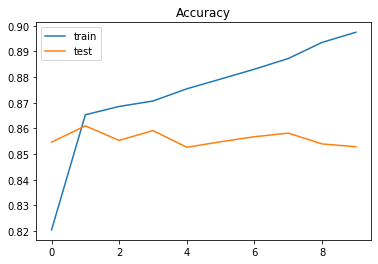

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()